<a href="https://colab.research.google.com/github/Fhtd04/dotfiles/blob/master/Aula5_Ex02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5 - Exercícios - Gráficos
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor


### 5.2 Plote um gráfico que mostre a evolução ao longo do tempo dos dados de curetagem do Estado de São Paulo.


#### Dica: Inspire-se no exercício quase igual a esse resolvido durante a aula 5. O que você precisa fazer a mais é filtrar os dados do Estado de São Paulo.
#### path_curetagem='../../curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'


In [3]:
!git clone https://github.com/alexlopespereira/curso_ciencia_dados2020.git ./curso_ciencia_dados2020

Cloning into './curso_ciencia_dados2020'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 323 (delta 125), reused 258 (delta 79), pack-reused 0
Receiving objects: 100% (323/323), 29.87 MiB | 10.48 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [20]:
from datetime import datetime
import locale
import matplotlib.pyplot as plt

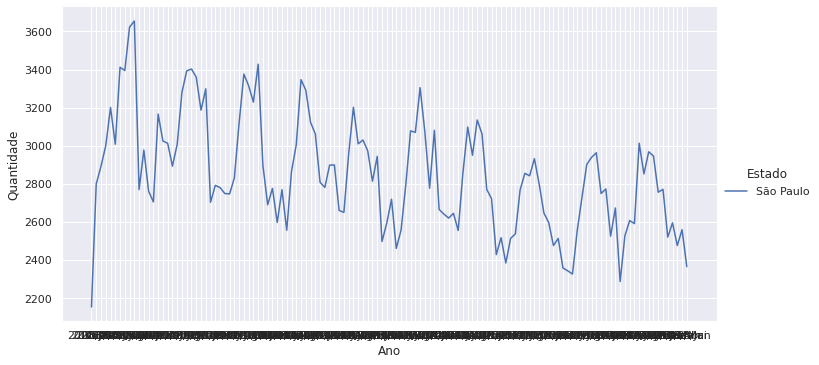

In [27]:
path_curetagem='./curso_ciencia_dados2020/data/originais/curetagem/consolidado/curetagem2018.xlsx'
df = pd.read_excel(path_curetagem, na_values='-')
df.rename(columns={'Unidade da Federação': 'uf'}, inplace=True)
del df['Total']
df_unpivoted = df.melt(id_vars=['uf'], var_name='Ano', value_name='Quantidade')

#locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
#df_unpivoted['Ano'] = df_unpivoted['Ano'].apply(lambda x: datetime.strptime(x, '%Y/%b'))
df_unpivoted['Quantidade'] = df_unpivoted['Quantidade'].astype(float)
df_unpivoted[['Cod_Mun','Estado']] = df_unpivoted.uf.str.split(' ', 1, expand=True)
df_unpivoted = df_unpivoted[df_unpivoted['Estado']=='São Paulo']
graf = sns.relplot(x="Ano", y="Quantidade", hue="Estado", aspect=2, kind="line", data=df_unpivoted);

graf

In [ ]:
# Plote seu gráfico aqui


